# Simple Model Creation
Create a database for all variable that will make up the simple model.


In [53]:
import os
import requests
import re

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from typing import Optional

import censusdis.datasets as cds
import censusdis.data as ced
import censusdis.maps as cem
import censusdis.values as cev
from censusdis.states import ALL_STATES_DC_AND_PR 
from censusdis import states


In [99]:
DATASET = "acs/acs5"
YEAR = 2020

# This is a census variable for median household income.
# See https://api.census.gov/data/2020/acs/acs5/variables/B19013_001E.html
VARIABLE = None

MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

VARIABLES = ["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE]

reader = cem.ShapeReader(year=YEAR)

gdf_state_bounds = reader.read_cb_shapefile("us", "state")
gdf_state_bounds = gdf_state_bounds[
    gdf_state_bounds["STATEFP"].isin(states.ALL_STATES_AND_DC)
]

In [107]:
# Plot function
plt.rcParams["figure.figsize"] = (18, 8)

def plot_map(
    gdf: gpd.GeoDataFrame,
    geo: str,
    *,
    gdf_bounds: Optional[gpd.GeoDataFrame] = None,
    bounds_color: str = "white",
    **kwargs,
):
    """Plot a map."""
    if gdf_bounds is None:
        gdf_bounds = gdf

    ax = cem.plot_us(gdf_bounds, color="lightgray")

    min_value = VARIABLE.min()
    max_value = VARIABLE.max()

    ax = cem.plot_us(
        gdf,
        VARIABLE,
        cmap="autumn",
        edgecolor="darkgray",
        legend=True,
        vmin=min_value,
        vmax=max_value,
        ax=ax,
        **kwargs,
    )

    ax = cem.plot_us_boundary(gdf_bounds, edgecolor=bounds_color, linewidth=0.5, ax=ax)

    ax.set_title(f"{YEAR} Median Household Income by {geo.title()}")

    ax.axis("off")

In [ ]:
YEAR = 2020
DATASET = "acs/acs5"


In [ ]:
group_age_and_sex = ['B01001','B01002','B01003']
group_commute = ["B08303","B08604"]
group_computers_and_internet = ["B28003"]
group_education = ["B15003","B15012","B20004"]
group_employement = ["B23001","B24010","B24012","B24030","B24032","B24115","B24116","B24135","B24136"]
group_housing = ["B25001","B25002","B25018","B25019","B25024","B25031","B25034","B25041","B25075"]
group_income_and_earnings = ["B19013","B19113","B19127","B20002","B20004"]
group_poverty = ["B17001"]
group_race_and_hispanic_origin = ["B02008","B02009","B02010","B02011","B02012","B02013","B19301"]

# tree = ced.variables.group_tree(
#     DATASET, 
#     YEAR, 
#     group_education[2]
#     )
# tree

In [ ]:
age_and_sex 
commute 
computers_and_internet
education 
employement
housing
income_and_earnings
poverty
race_and_hispanic_origin

In [82]:
# Define dataset and year
DATASET = "acs/acs5"
YEAR = 2021

# Base URL for accessing variables metadata from Census API
base_url = f"https://api.census.gov/data/{YEAR}/{DATASET}/variables.json"

# Fetch metadata from the Census API
response = requests.get(base_url)
if response.status_code == 200:
    metadata = response.json()["variables"]
else:
    raise Exception(f"Failed to fetch metadata. Status Code: {response.status_code}")

# Extract variable information and store it in a list
extracted_variables = []
for var_key, var_details in metadata.items():
    extracted_variables.append({
        "Variable_Code": var_key,
        "Label": var_details.get('label', 'N/A'),
        "Concept": var_details.get('concept', 'N/A')
    })

# Convert the extracted variables to a DataFrame for easier exploration
variables_df = pd.DataFrame(extracted_variables)

# Display the first few rows of the DataFrame
variables_df

,Variable_Code,Label,Concept
0,for,Census API FIPS 'for' clause,Census API Geography Specification
1,in,Census API FIPS 'in' clause,Census API Geography Specification
2,ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification
3,B24022_060E,Estimate!!Total:!!Female:!!Service occupations...,SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE P...
4,B19001B_014E,"Estimate!!Total:!!$100,000 to $124,999",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 202...
...,...,...,...
27922,B20005I_071E,"Estimate!!Total:!!Female:!!Worked full-time, y...",SEX BY WORK EXPERIENCE IN THE PAST 12 MONTHS B...
27923,B25124_022E,Estimate!!Total:!!Owner occupied:!!3-person ho...,TENURE BY HOUSEHOLD SIZE BY UNITS IN STRUCTURE
27924,B08113_054E,Estimate!!Total:!!Worked from home:!!Speak oth...,MEANS OF TRANSPORTATION TO WORK BY LANGUAGE SP...
27925,B06009_006E,Estimate!!Total:!!Graduate or professional degree,PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN TH...


In [114]:
leaves = ced.variables.group_leaves(
    DATASET, 
    YEAR, 
    group_age_and_sex[1]
    )
leaves

['B01002_001E', 'B01002_002E', 'B01002_003E', 'GEO_ID', 'NAME']

In [ ]:
variables_age_and_sex = ['B01001_001E','B01002_001E','B01003_001E']
variables_commute = ["B08303_001E","B08604_001E"]
variables_computers_and_internet = ["B28003_001E"]
variables_education = ["B15003_001E","B15012_001E","B20004_001E"]
variables_employement = ["B23001","B24010","B24012","B24030","B24032_001E","B24115_001E","B24116_001E","B24135_001E","B24136_001E"]
variables_housing = ["B25001_001E","B25002_001E","B25018_001E","B25019_001E","B25024_001E","B25031_001E","B25034_001E","B25041_001E","B25075_001E"]
variables_income_and_earnings = ["B19013_001E","B19113_001E","B19127_001E","B20002_001E","B20004_001E"]
variables_poverty = ["B17001_001E"]
variables_race_and_hispanic_origin = ["B02008_001E","B02009_001E","B02010_001E","B02011_001E","B02012_001E","B02013_001E","B19301_001E"]

In [116]:
variables_age_and_sex = [
'B01001_021E',
'B01001_022E',
'B01001_023E',
'B01001_024E',
'B01001_025E',
'B01001_027E',
'B01001_028E',
'B01001_029E',
'B01001_030E',
'B01001_031E',
'B01001_032E',
'B01001_033E',
'B01001_034E',
'B01001_035E',
'B01001_036E',
'B01001_037E',
'B01001_038E',
'B01001_039E',
'B01001_040E',
'B01001_041E',
'B01001_042E',
'B01001_043E',
'B01001_044E',
'B01001_045E',
'B01001_046E',
'B01001_047E',
'B01001_048E',
'B01001_049E','B01002_001E', 'B01002_002E', 'B01002_003E', 'B01003_001E']
# variables_commute = [
#     "B08303_001E",
#     'B08303_002E',
#  'B08303_003E', 'B08303_004E', 'B08303_005E', 'B08303_006E', 'B08303_007E', 'B08303_008E', 'B08303_009E', 'B08303_010E', 'B08303_011E', 'B08303_012E', 'B08303_013E',
#     "B08604_001E"]
# variables_computers_and_internet = [
#     "B28003_001E",
#     'B28003_002E',
#     'B28003_003E', 
#     'B28003_004E', 'B28003_005E', 'B28003_006E'
#     ]
# variables_education = [
#     'B15003_002E',
#  'B15003_003E', 'B15003_004E', 'B15003_005E', 'B15003_006E', 'B15003_007E', 'B15003_008E', 'B15003_009E', 'B15003_010E', 'B15003_011E', 'B15003_012E', 'B15003_013E', 'B15003_014E', 'B15003_015E', 'B15003_016E', 'B15003_017E', 'B15003_018E', 'B15003_019E', 'B15003_020E', 'B15003_021E', 'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E',
#     'B15012_002E',
#  'B15012_003E', 'B15012_004E', 'B15012_005E', 'B15012_006E', 'B15012_007E', 'B15012_008E', 'B15012_009E', 'B15012_010E', 'B15012_011E', 'B15012_012E', 'B15012_013E', 'B15012_014E', 'B15012_015E', 'B15012_016E',
#     'B20004_002E',
#  'B20004_003E', 'B20004_004E', 'B20004_005E', 'B20004_006E', 'B20004_008E', 'B20004_009E', 'B20004_010E', 'B20004_011E', 'B20004_012E', 'B20004_014E', 'B20004_015E', 'B20004_016E', 'B20004_017E', 'B20004_018E',
#  ]
# variables_employement = [
#     "B23001",
#     "B24010",
#     "B24012",
#     "B24030",
#     "B24032_001E",
#     "B24115_001E",
#     "B24116_001E",
#     "B24135_001E",
#     "B24136_001E"]
# variables_housing = [
#     "B25001_001E",
#     "B25002_001E",
#     "B25018_001E",
#     "B25019_001E",
#     "B25024_001E",
#     "B25031_001E",
#     "B25034_001E",
#     "B25041_001E",
#     "B25075_001E"]
# variables_income_and_earnings = [
#     "B19013_001E",
#     "B19113_001E",
#     "B19127_001E",
#     "B20002_001E",
#     "B20004_001E"]
# variables_poverty = [
#     "B17001_001E"]
# variables_race_and_hispanic_origin = [
#     "B02008_001E",
#     "B02009_001E",
#     "B02010_001E",
#     "B02011_001E",
#     "B02012_001E",
#     "B02013_001E",
#     "B19301_001E"]

## Hide


In [ ]:
# # Define a function to get metadata from the Census API
# def get_variable_metadata(DATASET, YEAR):
#     # Construct URL to access metadata for the dataset
#     base_url = f"https://api.census.gov/data/{YEAR}/{DATASET}/variables.json"
#     response = requests.get(base_url)
#     if response.status_code == 200:
#         metadata = response.json()['variables']
#         return metadata
#     else:
#         raise Exception(f"Failed to get metadata. Status Code: {response.status_code}")


# # Get metadata for the specified dataset
# variables_metadata = get_variable_metadata(DATASET, YEAR)

# # Filter metadata to include only those variables that belong to the desired groups
# filtered_variables = {
#     var: details for var, details in variables_metadata.items()
#     if any(var.startswith(group) for group in group_age_and_sex)
# }

# # Convert filtered variables into a DataFrame for easy viewing
# filtered_variables_df = pd.DataFrame.from_dict(filtered_variables, orient='index')

# # Rename columns for clarity
# filtered_variables_df = filtered_variables_df[['label', 'concept']]
# filtered_variables_df.columns = ['Label', 'Concept']

# # Display the first few rows
# print(filtered_variables_df)

# # Convert filtered variables to a dictionary for easier use
# filtered_labels = filtered_variables_df['Label'].to_dict()
# print(filtered_labels)

In [ ]:
# filtered_variables_df

In [ ]:
# def clean_label(label):
#     # Step 1: Replace "!!" and ":" with "_"
#     cleaned = label.replace("!!", "_").replace(":", "_")
    
#     # Step 2: Remove the "Estimate" prefix if it exists
#     cleaned = re.sub(r'^Estimate_?', '', cleaned)
    
#     # Step 3: Replace spaces with underscores and convert to a more readable format
#     cleaned = cleaned.replace(" ", "_")
    
#     # Step 4: Convert multiple underscores into a single one
#     cleaned = re.sub(r'_+', '_', cleaned)

#     return cleaned

# filtered_variables_df['Cleaned_Label'] = filtered_variables_df['Label'].apply(clean_label)
# filtered_variables_df

In [ ]:
# def clean_concept(concept):
#     # Step 1: Remove anything in parentheses, including the parentheses
#     cleaned = re.sub(r'\s*\([^)]*\)', '', concept)
    
#     # Step 2: Replace spaces with underscores and make the string uppercase
#     cleaned = cleaned.strip().replace(" ", "_").upper()
    
#     return cleaned
# filtered_variables_df['Cleaned_Concept'] = filtered_variables_df['Concept'].apply(clean_concept)
# filtered_variables_df


In [ ]:
# leaves = ced.variables.group_leaves(DATASET, YEAR, group_age_and_sex[0])
# leaves

## Return

In [ ]:
gdf_cbsa = ced.download(
    DATASET,
    YEAR,
    variables_age_and_sex,
    metropolitan_statistical_area_micropolitan_statistical_area="*",
    with_geometry=True,
)



,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,...,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E,B01002_001E,B01002_002E,B01002_003E,B01003_001E,geometry
0,10100,701,755,544,488,345,1360,1491,1557,770,...,862,726,697,615,767,37.7,36.9,38.5,42864,"POLYGON ((-99.70847 45.31824, -99.70837 45.332..."
1,10140,1493,2072,1207,876,677,2006,2116,1992,1238,...,1970,2059,1436,986,836,44.3,42.6,45.8,73769,"MULTIPOLYGON (((-123.88453 46.96579, -123.8771..."
2,10180,1998,2945,1856,1663,1195,5746,5033,5952,3266,...,2748,3169,2748,2043,2058,34.1,33.0,35.3,171354,"POLYGON ((-100.15184 32.09064, -100.15170 32.1..."
3,10220,476,667,474,487,232,1243,1306,1225,737,...,526,775,735,439,463,36.0,34.6,37.3,38385,"POLYGON ((-96.93249 34.69496, -96.93249 34.767..."
4,10300,1786,2226,1368,998,682,2575,2709,2845,1830,...,2066,2208,1806,968,1536,42.1,40.2,43.7,98310,"POLYGON ((-84.36330 42.07346, -84.33584 42.073..."


In [121]:
gdf_cbsa = gpd.GeoDataFrame(gdf_cbsa, geometry='geometry')

In [122]:

gdf_cbsa.head(5)


,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,...,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E,B01002_001E,B01002_002E,B01002_003E,B01003_001E,geometry
0,10100,701,755,544,488,345,1360,1491,1557,770,...,862,726,697,615,767,37.7,36.9,38.5,42864,"POLYGON ((-99.70847 45.31824, -99.70837 45.332..."
1,10140,1493,2072,1207,876,677,2006,2116,1992,1238,...,1970,2059,1436,986,836,44.3,42.6,45.8,73769,"MULTIPOLYGON (((-123.88453 46.96579, -123.8771..."
2,10180,1998,2945,1856,1663,1195,5746,5033,5952,3266,...,2748,3169,2748,2043,2058,34.1,33.0,35.3,171354,"POLYGON ((-100.15184 32.09064, -100.15170 32.1..."
3,10220,476,667,474,487,232,1243,1306,1225,737,...,526,775,735,439,463,36.0,34.6,37.3,38385,"POLYGON ((-96.93249 34.69496, -96.93249 34.767..."
4,10300,1786,2226,1368,998,682,2575,2709,2845,1830,...,2066,2208,1806,968,1536,42.1,40.2,43.7,98310,"POLYGON ((-84.36330 42.07346, -84.33584 42.073..."


In [123]:
gdf_cbsa.to_parquet("cbsa.parquet")


In [118]:
gdf_cbsa.columns

Index(['METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA',
       'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E',
       'B01001_025E', 'B01001_027E', 'B01001_028E', 'B01001_029E',
       'B01001_030E', 'B01001_031E', 'B01001_032E', 'B01001_033E',
       'B01001_034E', 'B01001_035E', 'B01001_036E', 'B01001_037E',
       'B01001_038E', 'B01001_039E', 'B01001_040E', 'B01001_041E',
       'B01001_042E', 'B01001_043E', 'B01001_044E', 'B01001_045E',
       'B01001_046E', 'B01001_047E', 'B01001_048E', 'B01001_049E',
       'B01002_001E', 'B01002_002E', 'B01002_003E', 'B01003_001E', 'geometry'],
      dtype='object')

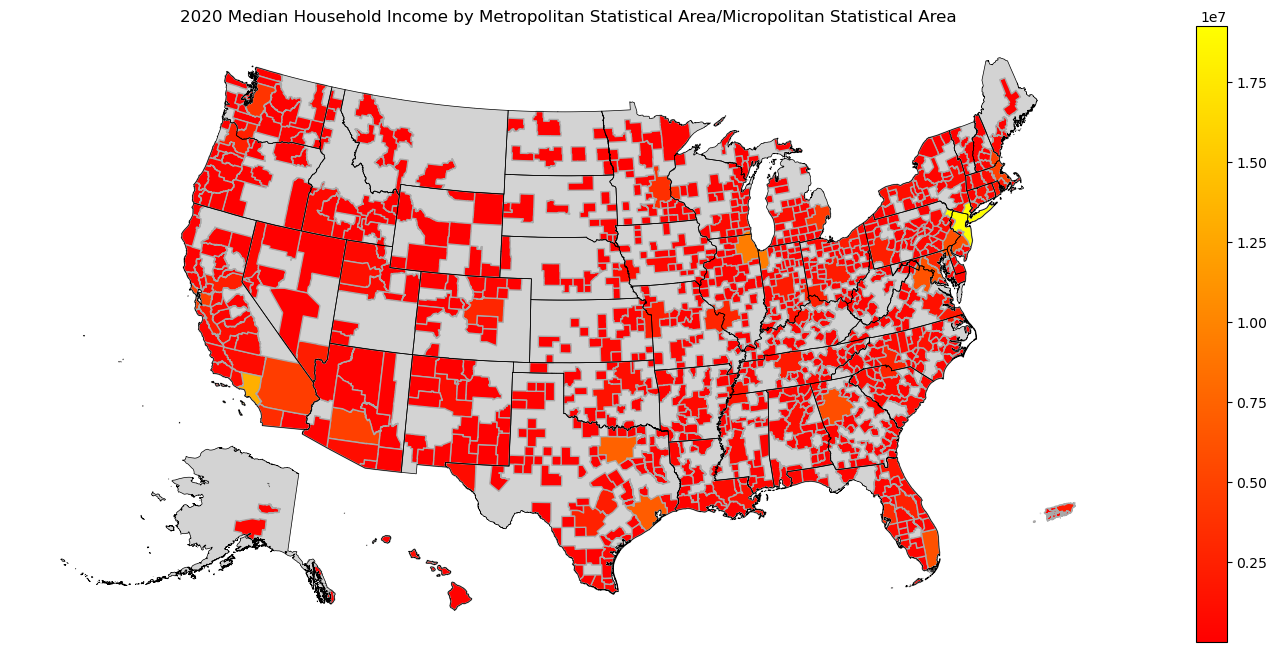

In [109]:
VARIABLE = gdf_cbsa["B01001_001E"]
plot_map(
    gdf_cbsa,
    "metropolitan statistical area/micropolitan statistical area",
    gdf_bounds=gdf_state_bounds,
    bounds_color="black",
)